import libraries

In [13]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

define hyperparameters

In [14]:
EPOCH = 100
BATCH_SIZE = 64
LR = 0.01

download and import mnist data

In [15]:
train_data = torchvision.datasets.MNIST(root='./',train=True,download=False,transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.MNIST(root='./',train=False,transform=torchvision.transforms.ToTensor())
train_loader = Data.DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True,num_workers=2)
train_x = Variable(train_data.train_data.view(-1,28*28)).type(torch.FloatTensor)
train_y = train_data.train_labels
alltest_x = Variable(test_data.test_data.view(-1, 28*28)).type(torch.FloatTensor)
alltest_y = test_data.test_labels
val_x = alltest_x[:5000]
val_y = alltest_y[:5000]
test_x = alltest_x[5000:]
test_y = alltest_y[5000:]

In [16]:
import numpy as np
import pandas as pd
y = val_y.numpy()
y1 = train_y.numpy()
y2 = test_y.numpy()
d = pd.DataFrame(y)
d1 = pd.DataFrame(y1)
d2 = pd.DataFrame(y2)
print(d.describe())
print(d1.describe())
print(d2.describe())

                0
count  5000.00000
mean      4.47180
std       2.88965
min       0.00000
25%       2.00000
50%       4.00000
75%       7.00000
max       9.00000
                  0
count  60000.000000
mean       4.453933
std        2.889270
min        0.000000
25%        2.000000
50%        4.000000
75%        7.000000
max        9.000000
                 0
count  5000.000000
mean      4.415000
std       2.902078
min       0.000000
25%       2.000000
50%       4.000000
75%       7.000000
max       9.000000


Define Fully Connected Neural Network

In [17]:
class FCNets(nn.Module):
    def __init__(self,nlist):
        super(FCNets,self).__init__()
        if len(nlist) < 2:
            print('error:not enough layers')
        else:
            self.fc = nn.Sequential()
            for n in range(len(nlist)-1):
                self.fc.add_module('linear' + str(n+1), nn.Linear(in_features=nlist[n], out_features=nlist[n+1]))
                self.fc.add_module('relu' + str(n+1), nn.ReLU())
            #self.fc.add_module('softmax', nn.Softmax())
    def forward(self,x):
        return self.fc(x)

Define Neural Net instance and optimizer, loss function

In [18]:
fc = FCNets([28*28,32,10])
print(fc)
optimizer = torch.optim.SGD(params=fc.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

FCNets(
  (fc): Sequential(
    (linear1): Linear(in_features=784, out_features=32)
    (relu1): ReLU()
    (linear2): Linear(in_features=32, out_features=10)
    (relu2): ReLU()
  )
)


In [19]:
train_acc =  []
val_acc = []
epochs = []
train_loss = []

In [20]:
for epoch in range(EPOCH):
    for step,(x,y) in enumerate(train_loader):
        x = x.view(-1,28*28)
        bx = Variable(x)
        by = Variable(y)
        output = fc(bx)
        loss = loss_func(output, by)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

    val_y_predict = torch.max(fc(val_x),1)[1].data
    train_y_predict = torch.max(fc(train_x),1)[1].data
    val_accuracy = sum(val_y_predict == val_y)/len(val_y)
    train_accuracy = sum(train_y_predict == train_y)/len(train_y)
    train_acc.append(train_accuracy)
    val_acc.append(val_accuracy)
    epochs.append(epoch)
    train_loss.append(loss)
    print('Epoch:',epoch,'train loss:%.4f' %loss.data[0],'train accuracy is:%.4f' %train_accuracy,'validation accuracy is:%.4f' %val_accuracy)

Epoch: 0 train loss:1.0527 train accuracy is:0.7623 validation accuracy is:0.7472
Epoch: 1 train loss:0.4266 train accuracy is:0.8778 validation accuracy is:0.8536
Epoch: 2 train loss:0.5514 train accuracy is:0.8927 validation accuracy is:0.8716
Epoch: 3 train loss:0.4284 train accuracy is:0.8981 validation accuracy is:0.8766
Epoch: 4 train loss:0.2990 train accuracy is:0.9021 validation accuracy is:0.8814
Epoch: 5 train loss:0.3105 train accuracy is:0.9047 validation accuracy is:0.8858
Epoch: 6 train loss:0.2519 train accuracy is:0.9082 validation accuracy is:0.8912
Epoch: 7 train loss:0.2169 train accuracy is:0.9093 validation accuracy is:0.8952
Epoch: 8 train loss:0.3822 train accuracy is:0.9145 validation accuracy is:0.8986
Epoch: 9 train loss:0.2754 train accuracy is:0.9103 validation accuracy is:0.8944
Epoch: 10 train loss:0.3425 train accuracy is:0.9165 validation accuracy is:0.9012
Epoch: 11 train loss:0.3427 train accuracy is:0.9172 validation accuracy is:0.9002
Epoch: 12 trai

In [21]:
test_y_predict = torch.max(fc(test_x),1)[1].data
test_accuracy = sum(test_y_predict == test_y)/len(test_y)
train_y_predict = torch.max(fc(train_x),1)[1].data
train_accuracy = sum(train_y_predict == train_y)/len(train_y)
print('Final train loss:%.4f' %loss.data[0],'Final train accuracy is:%.4f' %train_accuracy,'Final test accuracy is:%.4f' %test_accuracy)
        

Final train loss:0.0712 Final train accuracy is:0.9684 Final test accuracy is:0.9734


if neural nets size is 784 10
with lr = 0.01 
achieve accuracy of 92%
if neural nets size is 784 32 10
with lr = 0.01 epoch=1000
achieve accuracy of 99.5%

In [22]:
for param in fc.parameters():
    print(type(param.data), param.size())

<class 'torch.FloatTensor'> torch.Size([32, 784])
<class 'torch.FloatTensor'> torch.Size([32])
<class 'torch.FloatTensor'> torch.Size([10, 32])
<class 'torch.FloatTensor'> torch.Size([10])


In [23]:
torch.save(fc,'fc.pkl')

/home/yunyou/anaconda3/lib/python3.6/site-packages/torch/serialization.py:158: UserWarning: Couldn't retrieve source code for container of type FCNets. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


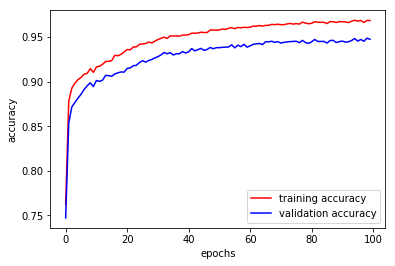

In [24]:
plt.plot(epochs,train_acc,'r',label = 'training accuracy')
plt.plot(epochs,val_acc,'b',label= 'validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

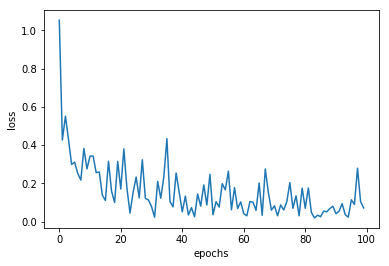

In [25]:
plt.plot(epochs,[i.data[0] for i in train_loss])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()